1. Impoting Dependencies :

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn import metrics
import pickle

2. Data Collcetion and Analysis:

A- Loading dataset :

In [29]:
data_calories = pd.read_csv("C:/Machine_learning Python/projets/calorrieBurned/calories.csv")
data_exercices = pd.read_csv("C:/Machine_learning Python/projets/calorrieBurned/exercise.csv")

In [30]:
data_exercices

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


B- Head of the datas

In [31]:
data_calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [32]:
data_exercices.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [33]:
data_calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


C- Combining the data into one data:

In [34]:
data_caloriesBurned = pd.concat( [data_exercices, data_calories["Calories"] ] , axis=1   )

In [35]:
data_caloriesBurned.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


D-Number of row & columns:

In [36]:
data_caloriesBurned.shape

(15000, 9)

2. Statisctical measures :

A- General Statistic:

In [37]:
data_caloriesBurned.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


B- Information about the data:

In [38]:
data_caloriesBurned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


C- Number of missing value in each column;

In [39]:
data_caloriesBurned.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

3- Data Visualisation:

A- Basic set:

In [40]:
sns.set()

B- Distrubution of the gender column:

<Axes: xlabel='Gender', ylabel='count'>

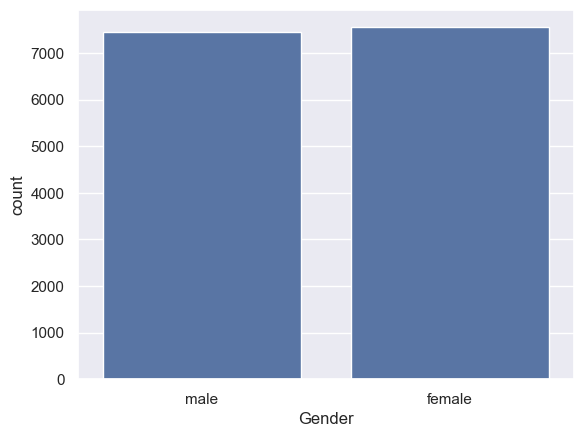

In [41]:
sns.countplot(data=data_caloriesBurned, x='Gender')

C-  Distrubution of the age column:

C:\Users\HP\AppData\Local\Temp\ipykernel_14400\219086085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_caloriesBurned['Age'])


<Axes: xlabel='Age', ylabel='Density'>

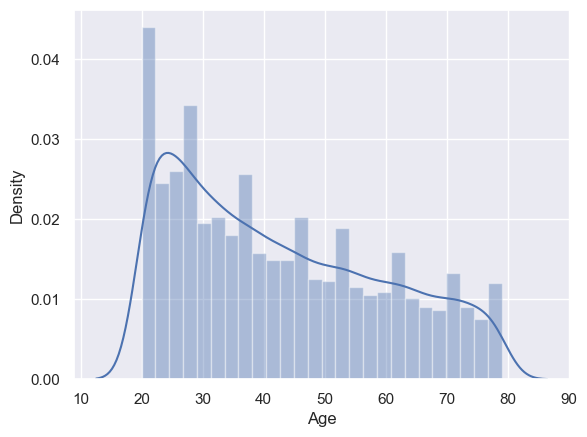

In [42]:
sns.distplot(data_caloriesBurned['Age'])

D-  Distrubution of the height column:

C:\Users\HP\AppData\Local\Temp\ipykernel_14400\479023956.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_caloriesBurned['Height'])


<Axes: xlabel='Height', ylabel='Density'>

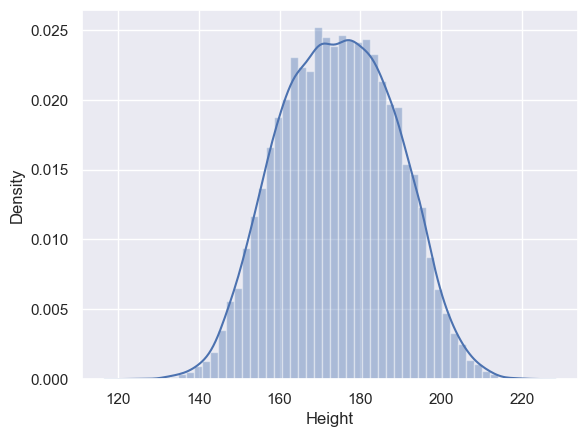

In [43]:
sns.distplot(data_caloriesBurned['Height'])

E-  Distrubution of the weight column:

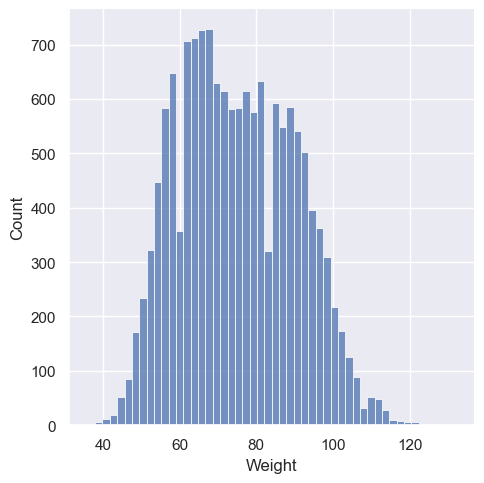

In [44]:
sns.displot(data_caloriesBurned["Weight"])

4. The correlation:

A- Convertion of the column gender (male = 0) ,(female = 1):

In [45]:
data_caloriesBurned.replace({"Gender" : {'male': 1 , 'female' : 0}}, inplace=True)
data_caloriesBurned.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


B- Variable de correlation:

In [46]:
corr = data_caloriesBurned.corr()

C- Matrice de correlation:

<Axes: >

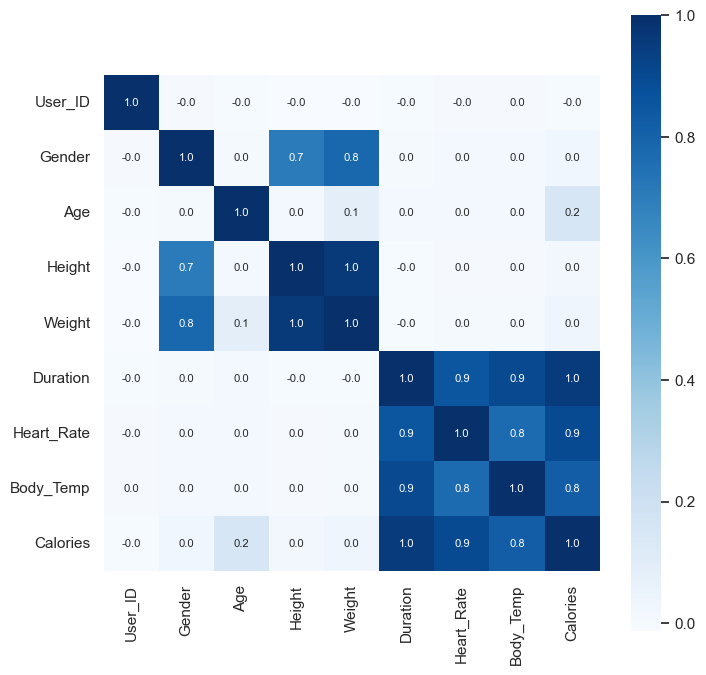

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(corr , cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

5. Train test split:

A- Separating a data & label

In [48]:
X = data_caloriesBurned.drop(columns= ["User_ID" ,"Calories"] , axis=1 )
Y = data_caloriesBurned["Calories"]
print(X)
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

B- Test Split:

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [50]:
print(X.shape,X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


6. Model Training:

A- Loading the model:

In [51]:
model = XGBRegressor()

B- Training the model:

In [52]:
model.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

7. Model Evaluation:

A- Absolute error:

In [53]:
prediction = model.predict(X_test)
erreur = metrics.mean_absolute_error(Y_test , prediction)
print("Absolute Error = ", erreur)

Absolute Error =  1.4833678883314132


B- Example:

In [56]:

def  prediction_calories(Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp):
    input_data = (Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp)
    #Input the data into the numpy array:
    input_dataNumpuy = np.asarray(input_data)
    #Reshape the data:
    input_dataReshaped = input_dataNumpuy.reshape(1,-1)
    prediction = model.predict(input_dataReshaped)
    return prediction[0]




print("Welcome to our model")
Gender = int(input("Enter your gender (1: male, 0: female): "))
Age = int(input("Enter your age: "))
Height = float(input("Enter your height: "))
Weight = float(input("Enter your weight: "))
Duration = float(input("Enter the test duration (min): "))
Heart_Rate = float(input("Enter your heart rate: "))
Body_Temp = float(input("Enter your body temperature (C): "))

print("You have burned: ", prediction_calories(Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp), "calories")


Welcome to our model
You have burned:  159.25092 calories


8. Deployment:

A- Saving the model:

In [ ]:
pickle.dump(model, open('calorie_model.sav','wb'))

B- Load the model

In [ ]:
load_model = pickle.load(open('calorie_model.sav' , 'rb'))

In [ ]:
import xgboost
print(xgboost.__version__)


2.0.3
